# Analysis Walkthrough of TAPS 
## Add libraries

In [36]:
# Standard library imports
import os
import sys
from datetime import datetime, timedelta

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Import your school's data

In [42]:
SCHOOLDATAFILE = "student_synthetic_data.csv"

In [71]:
school_data = pd.read_csv(SCHOOLDATAFILE)

# To order the response options correctly in visualizations
encoding_schemes = {
    1: ["Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"],
    2: ["Never", "Rarely", "Sometimes", "Often", "Always"],
    3: ["This did not happen to me", "Less than once a week", "About once a week", "Most days"]
}

 # Skip the first row, which contains metadata
school_data = school_data.drop(school_data.index[0])
# Display the first few rows of the dataframe
pd.DataFrame.head(school_data)

# In pif_satisfied, pif_noncompliance, and pif_enforcement, the values are percentages stored as strings.
# Use regex to extract the numeric values, which are before the '%' character
school_data['pif_satisfied'] = school_data['pif_satisfied'].str.extract(r'(\d+)%')[0]
school_data['pif_noncompliance'] = school_data['pif_noncompliance'].str.extract(r'(\d+)%')[0]
school_data['pif_enforcement'] = school_data['pif_enforcement'].str.extract(r'(\d+)%')[0]

# Convert all the columns with numerical data to numeric type
school_data['pif_satisfied'] = pd.to_numeric(school_data['pif_satisfied'], errors='coerce')
school_data['pif_noncompliance'] = pd.to_numeric(school_data['pif_noncompliance'], errors='coerce')
school_data['pif_enforcement'] = pd.to_numeric(school_data['pif_enforcement'], errors='coerce')



In [72]:

# Compute means and standard deviations
satisfaction_mean = school_data['pif_satisfied'].mean()
satisfaction_std = school_data['pif_satisfied'].std()
noncompliance_mean = school_data['pif_noncompliance'].mean()
noncompliance_std = school_data['pif_noncompliance'].std()
enforcement_mean = school_data['pif_enforcement'].mean()
enforcement_std = school_data['pif_enforcement'].std()

print(f"Satisfaction: Mean = {satisfaction_mean:.2f}, Std Dev = {satisfaction_std:.2f}")
print(f"Noncompliance: Mean = {noncompliance_mean:.2f}, Std Dev = {noncompliance_std:.2f}")
print(f"Enforcement: Mean = {enforcement_mean:.2f}, Std Dev = {enforcement_std:.2f}")



Satisfaction: Mean = 51.50, Std Dev = 32.55
Noncompliance: Mean = 49.10, Std Dev = 31.98
Enforcement: Mean = 49.10, Std Dev = 31.14


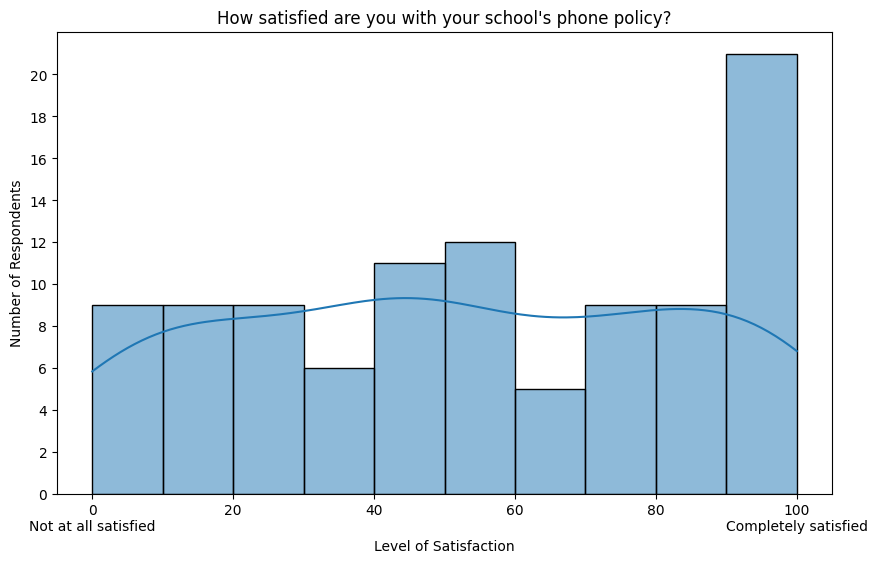

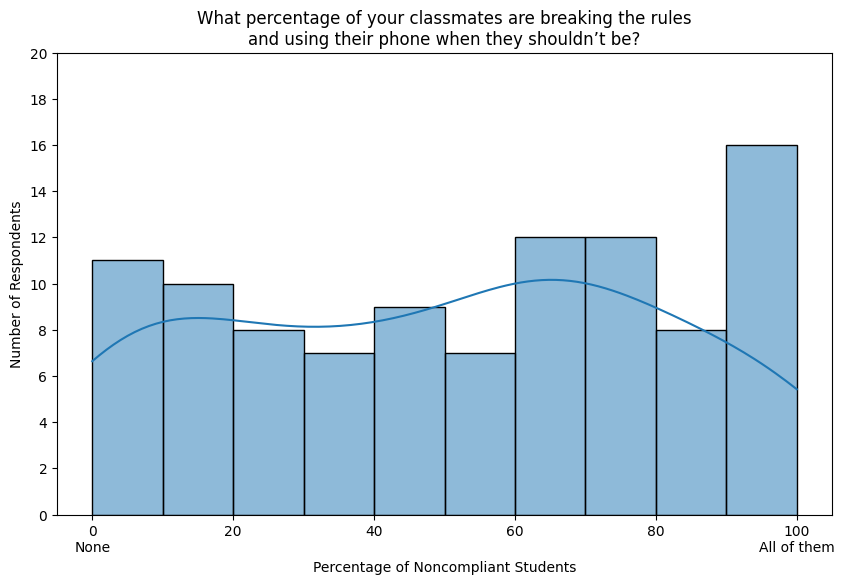

([<matplotlib.axis.XTick at 0x13a18ce10>,
 [Text(0, 0, '0\nNone of the time'),
  Text(20, 0, '20'),
  Text(40, 0, '40'),
  Text(60, 0, '60'),
  Text(80, 0, '80'),
  Text(100, 0, '100\nAll of the time')])

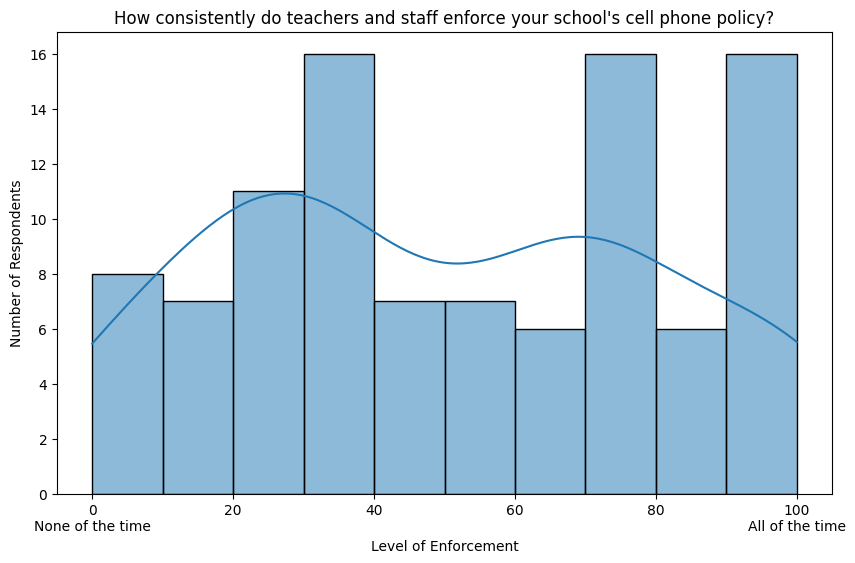

In [70]:

# Create a histogram to visualize the distribution of satisfaction responses
plt.figure(figsize=(10, 6))
sns.histplot(school_data['pif_satisfied'].dropna(), bins=10, kde=True)
plt.title('How satisfied are you with your school\'s phone policy?')
plt.xlabel('Level of Satisfaction')
plt.ylabel('Number of Respondents')

# Make the y-axis discrete
plt.yticks(range(0, 21, 2))

# Label the x-axis with "Not at all satisfied" at 0 and "Completely satisfied" at 100. Keep 0 and 100 at the ends.
plt.xticks([0, 20, 40, 60, 80, 100], ["0\nNot at all satisfied", "20", "40", "60", "80", "100\nCompletely satisfied"])
plt.show()

# Create a histogram to visualize the distribution of noncompliance responses
plt.figure(figsize=(10, 6))
sns.histplot(school_data['pif_noncompliance'].dropna(), bins=10, kde=True)
plt.title('What percentage of your classmates are breaking the rules\nand using their phone when they shouldn’t be?')
plt.xlabel('Percentage of Noncompliant Students')
plt.ylabel('Number of Respondents')

# Make the y-axis discrete
plt.yticks(range(0, 21, 2))

# Label the x-axis with "Not at all noncompliant" at 0 and "Completely noncompliant" at 100. Keep 0 and 100 at the ends.
plt.xticks([0, 20, 40, 60, 80, 100], ["0\nNone", "20", "40", "60", "80", "100\nAll of them"])
plt.show()

# Create a histogram to visualize the distribution of enforcement responses
plt.figure(figsize=(10, 6))
sns.histplot(school_data['pif_enforcement'].dropna(), bins=10, kde=True)
plt.title('How consistently do teachers and staff enforce your school\'s cell phone policy?')
plt.xlabel('Level of Enforcement')
plt.ylabel('Number of Respondents')
plt.xticks([0, 20, 40, 60, 80, 100], ["0\nNone of the time", "20", "40", "60", "80", "100\nAll of the time"])



## Generate histograms for the responses to the policy impact questions

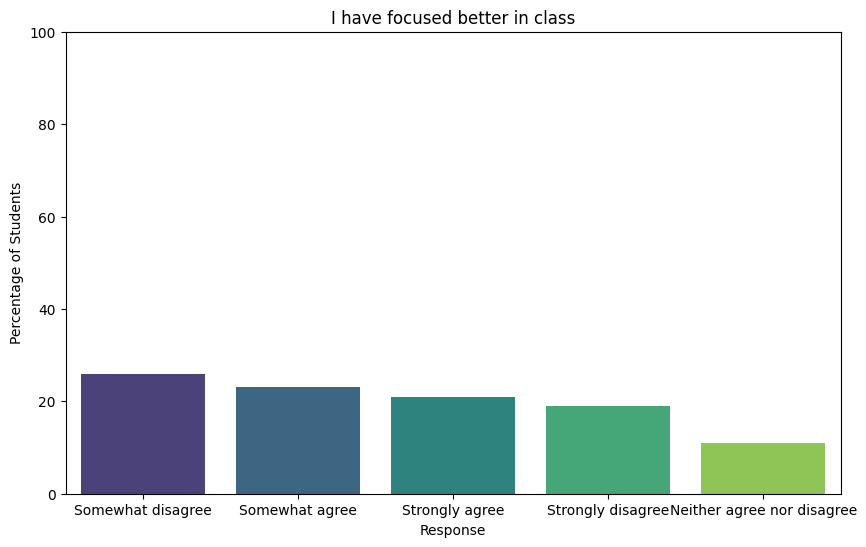

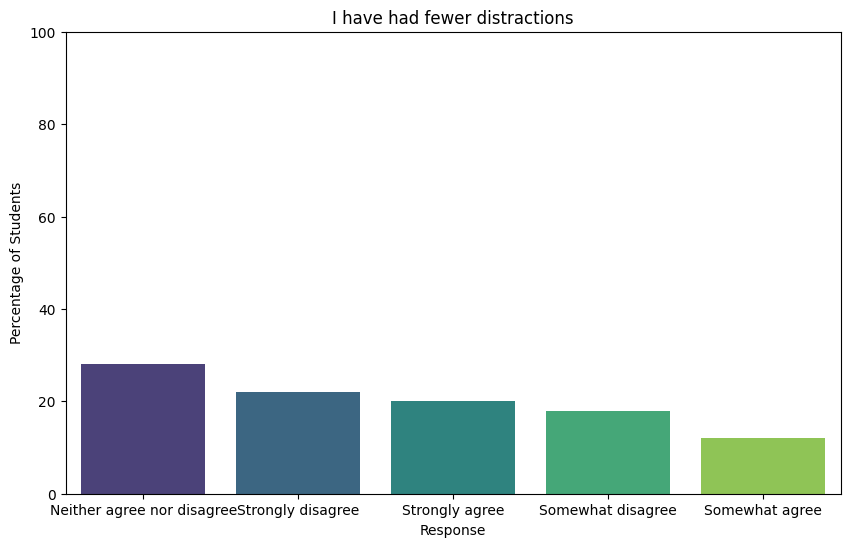

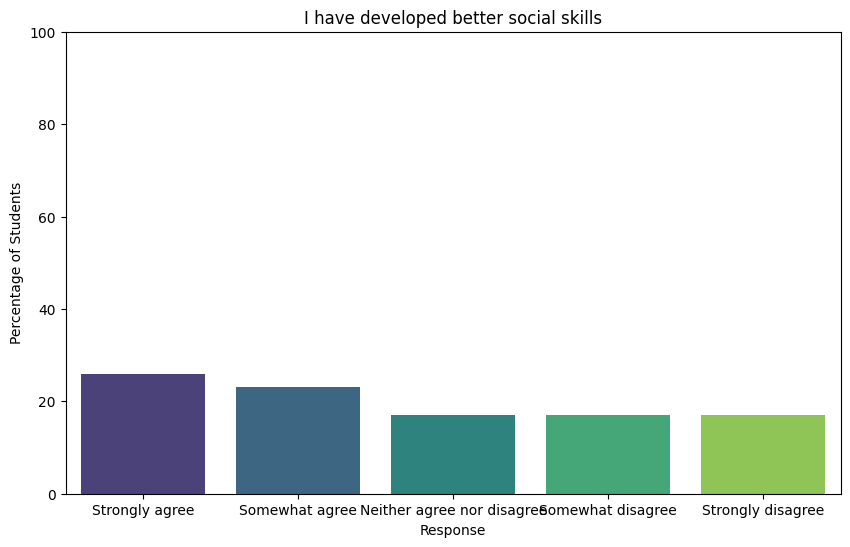

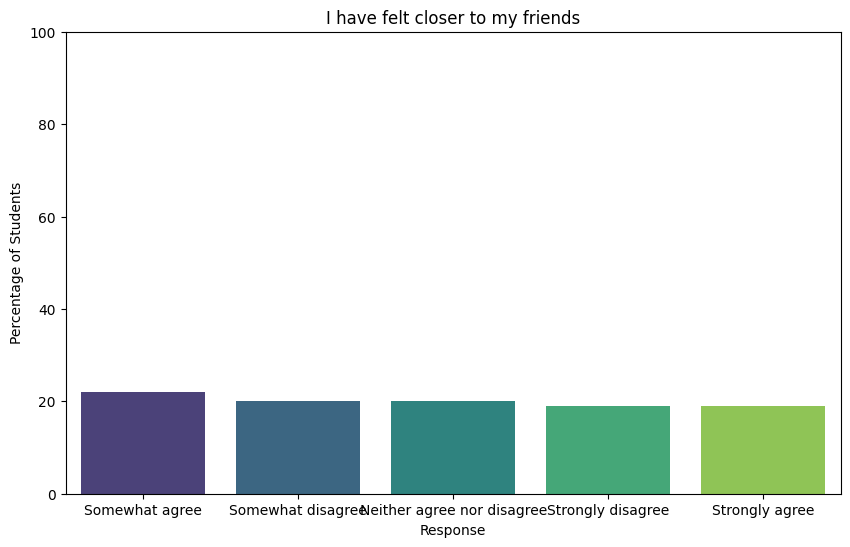

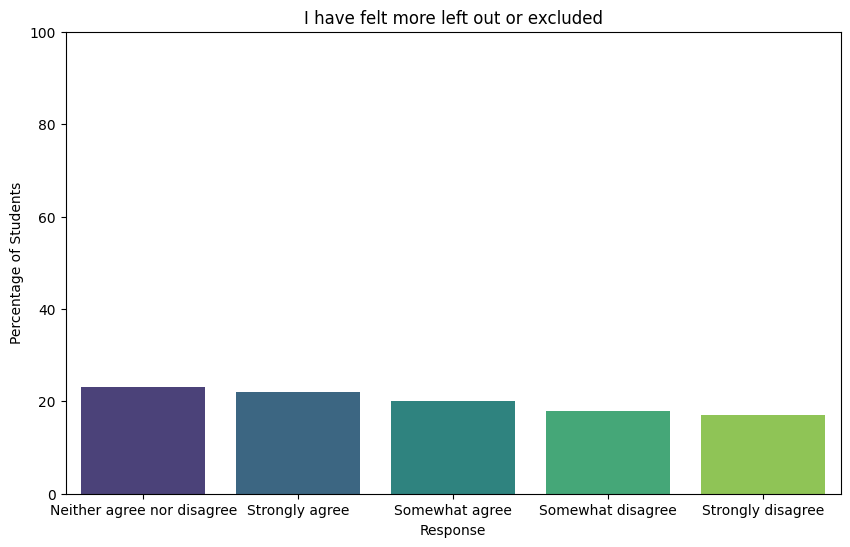

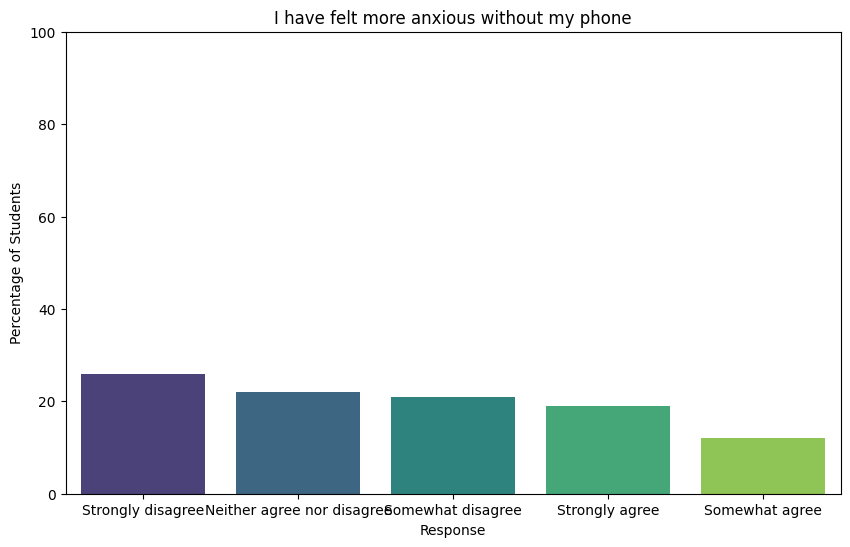

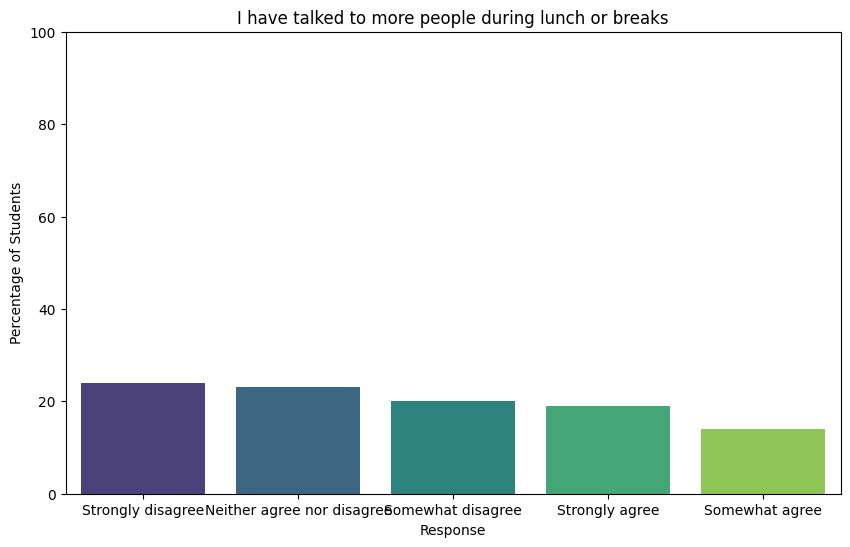

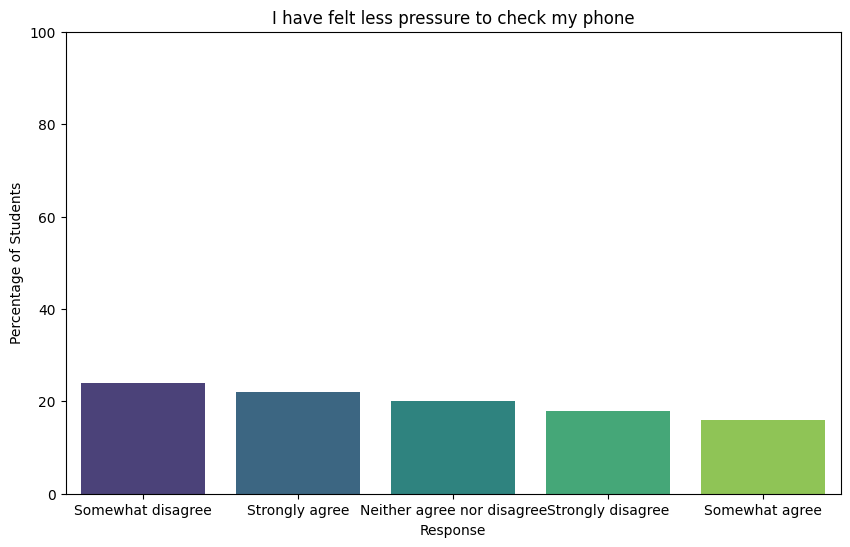

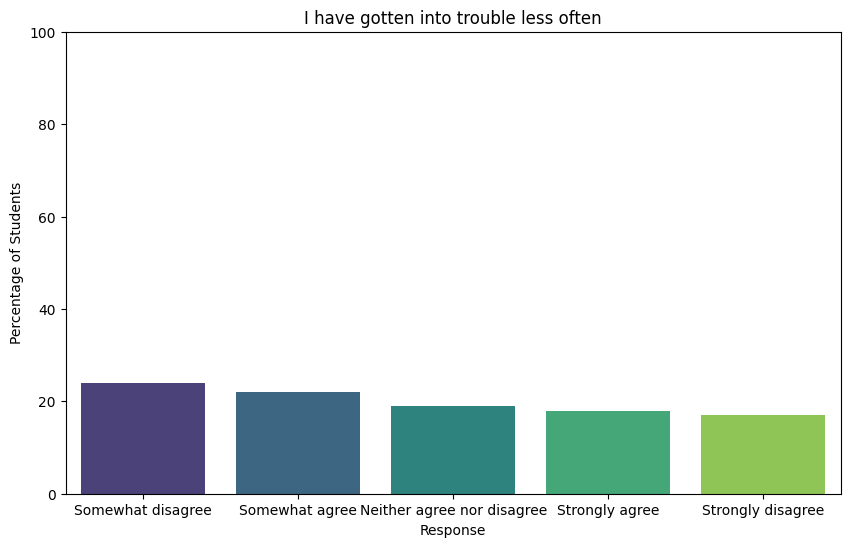

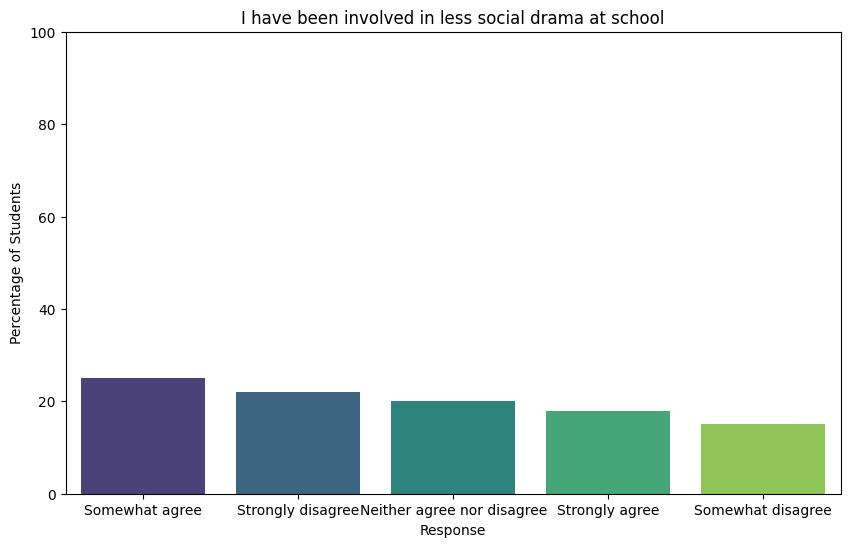

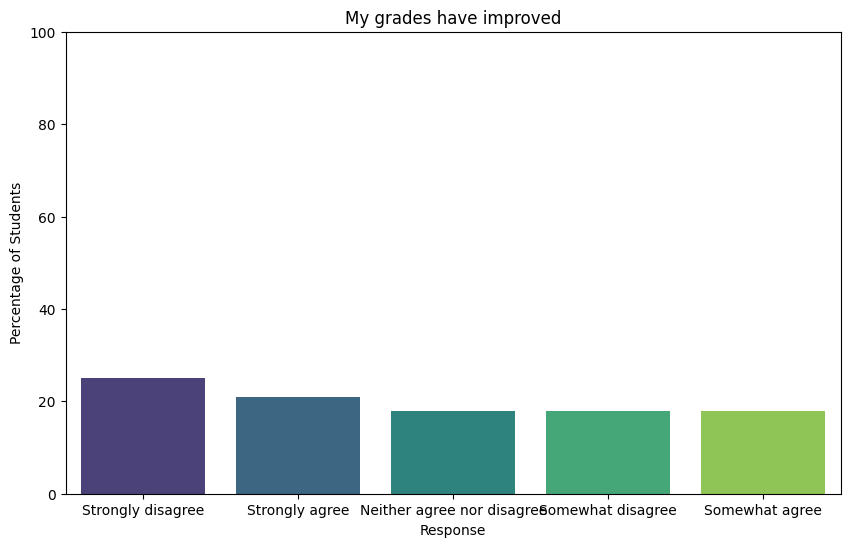

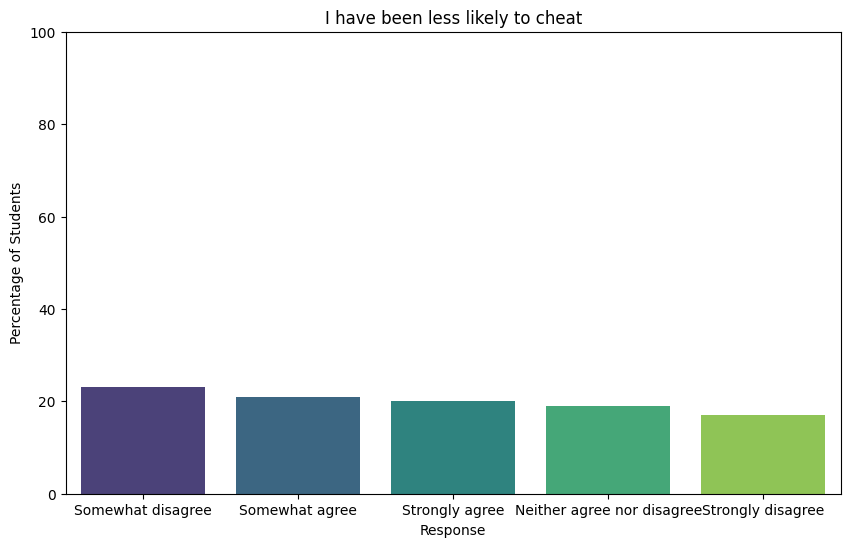

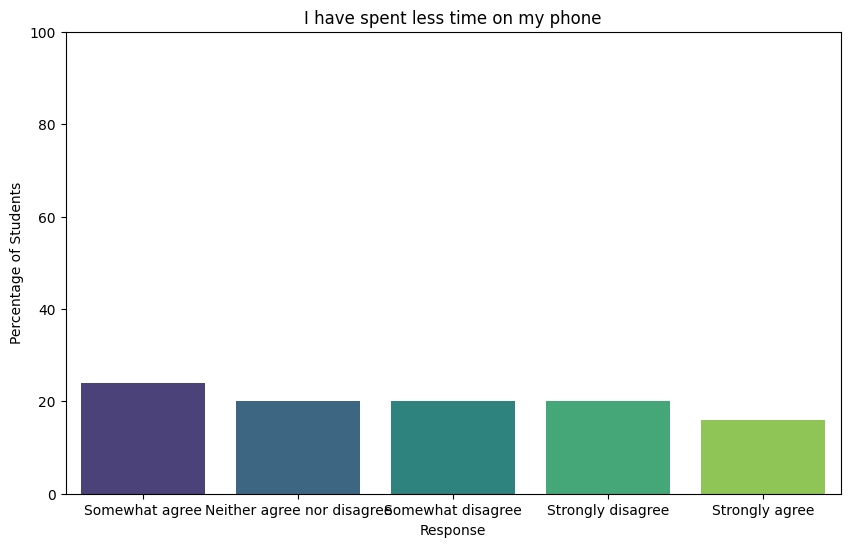

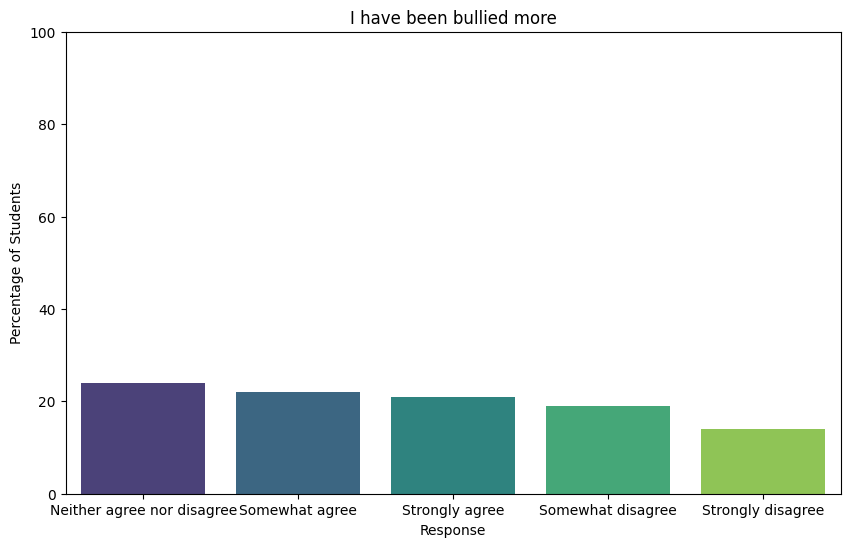

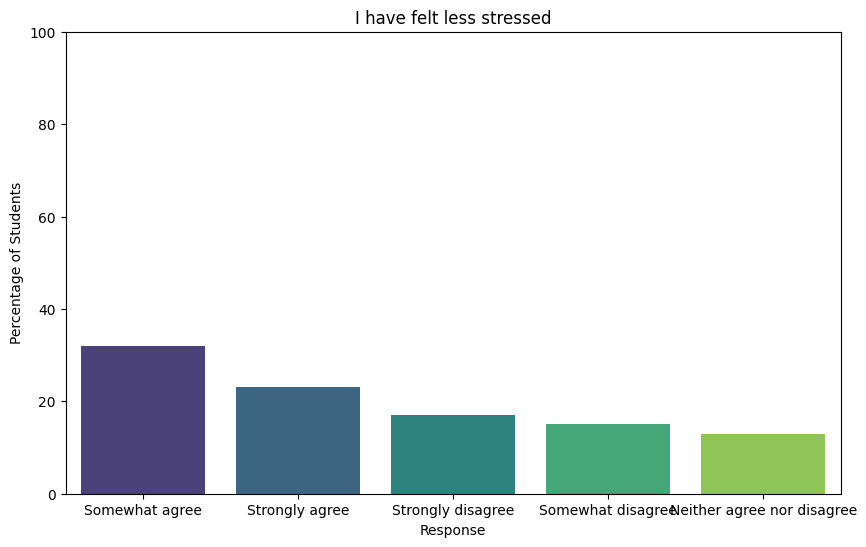

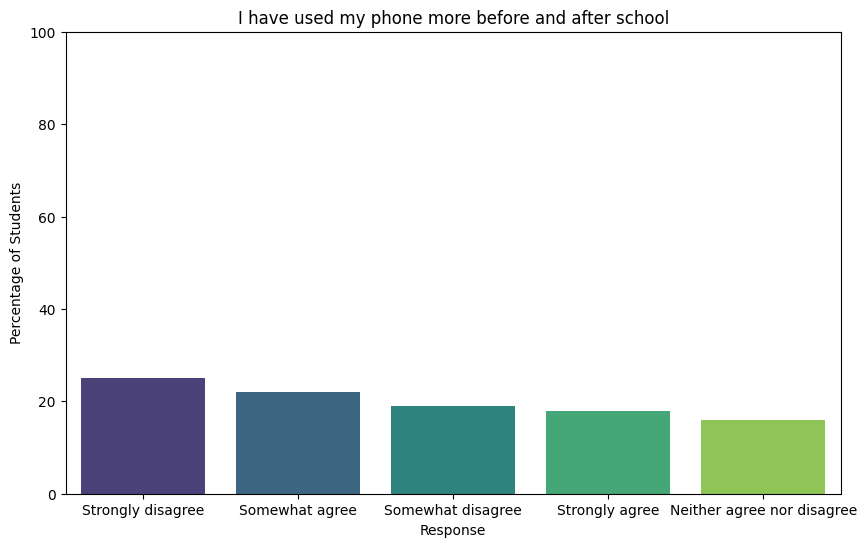

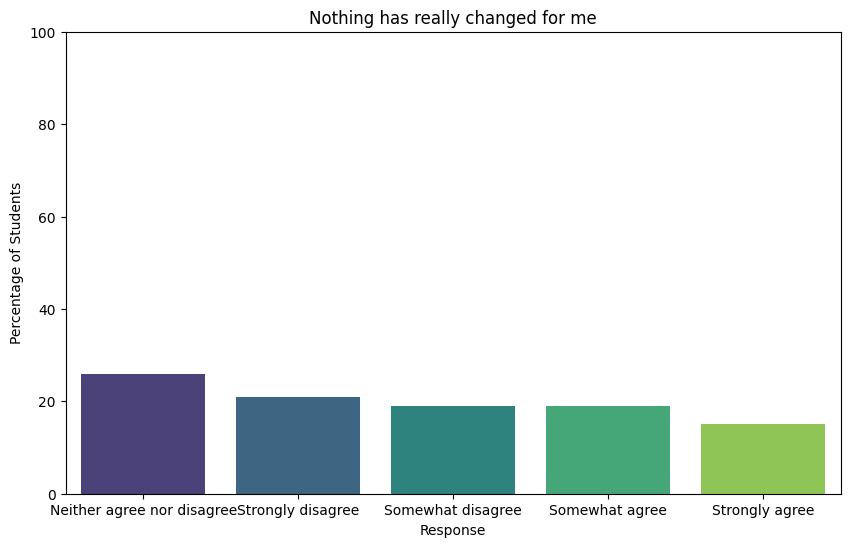

In [77]:
# For questions policy_impact_1 through policy_impact_17, generate individual barplots to visualize the distribution of responses
# What percentage of students responded to each question with each possible answer?

policy_questions = [f'policy_impact_{i}' for i in range(1, 18)]

# Specify the order of the responses to be the first encoding scheme
response_order = encoding_schemes[1]

# Specify what each policy question is about
policy_descriptions = {
    'policy_impact_1': 'I have focused better in class',
    'policy_impact_2': 'I have had fewer distractions',
    'policy_impact_3': 'I have developed better social skills',             
    'policy_impact_4': 'I have felt closer to my friends',
    'policy_impact_5': 'I have felt more left out or excluded',
    'policy_impact_6': 'I have felt more anxious without my phone',
    'policy_impact_7': 'I have talked to more people during lunch or breaks',
    'policy_impact_8': 'I have felt less pressure to check my phone',
    'policy_impact_9': 'I have gotten into trouble less often',
    'policy_impact_10': 'I have been involved in less social drama at school',
    'policy_impact_11': 'My grades have improved',
    'policy_impact_12': 'I have been less likely to cheat',
    'policy_impact_13': 'I have spent less time on my phone',
    'policy_impact_14': 'I have been bullied more',
    'policy_impact_15': 'I have felt less stressed',
    'policy_impact_16': 'I have used my phone more before and after school',
    'policy_impact_17': 'Nothing has really changed for me'
}
# For each question, calculate the counts and percentages of each response
for question in policy_questions:
    response_counts = school_data[question].value_counts()
    question_label = policy_descriptions.get(question, question)
    response_percentages = (response_counts / response_counts.sum()) * 100

    # Create a bar plot for the current question
    plt.figure(figsize=(10, 6))
    sns.barplot(x=response_percentages.index, hue=response_percentages.index, y=response_percentages.values, palette='viridis', legend=False)
    plt.title(f'{question_label}')
    plt.xlabel('Response')
    plt.ylabel('Percentage of Students')
    plt.ylim(0, 100)
    plt.show()
   
